In [1]:
import numpy as np
from random import seed 
from random import gauss 
from random import uniform
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import randint
from scipy.stats import poisson

# Binomial pmf

- Consider an experiment consisting of $N$ independent trials, each with two possible results: 'success' and 'failure'
    - probability for success in each trial is a constant, $P$. 
    - experiment characterised by $n$ (total number of successes). 
- Repeat experiment $N_{exps}$ times
    - $n$ would occur with relative frequencies ($P(n)$) given by the **binomial pmf**.
    
- **Binomial pmf**: 
 $$  f (n; N, P) = \frac{N!}{n!(N - n)!} P^{n} (1-P)^{N-n} $$
 
- Nice and intuitive derivation in Cowan section 2.1

- Special case of **multinomial** pmf with arbitrary number of possible results.


In [2]:
#binomial distribution
P = 0.5

N_exps = 5000
N = 5000
n = 0

results = np.array([])

for exp in range(0, N_exps):
    n = 0
    for tr in range(0, N):
        value = uniform(0, 1) # "roll the dice"
        if(value < P):
            n = n + 1
    results = np.append(n, results)

<Figure size 432x288 with 0 Axes>

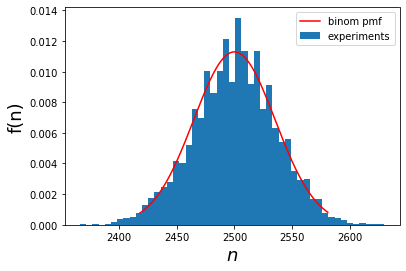

In [3]:
plt.figure()
fig, ax = plt.subplots(1, 1)
x = np.arange(binom.ppf(0.01, N, P), binom.ppf(0.99, N, P))
ax.plot(x, binom.pmf(x, N, P), 'r-',  label='binom pmf')
h = plt.hist(results, bins='auto',density=True, label='experiments')
labelx = ax.set_xlabel("$n$", fontsize = 18)
labely = ax.set_ylabel("f(n)", fontsize = 18)
plt.legend()
plt.show()

# Poisson pdf

- What if the number of trials $N$ is very large but the probaility of "success" P is very small such that $\nu = PN$ is some finite number
- In this limit, the binomial pmf simplifes to 

 $$  f (n; \nu) = \frac{\nu^{n}}{n!} e^{-\nu} $$
 
- This is the **Poisson pdf** an incredibly important pdf to particle, nuclear, and high energy physics


# Why is the poisson pdf so important?

- Large number of trials with small probability of "success" describes almost all particle physics experiments
- Radioactive decay: 
  - detector is read at high frequency for decay signal
  - each trial has low probability for observing decay
  - but the number of expected detected decays after a time **t** is finite

In [54]:
P = 0.00001 # low probability of observation
N = 500000 # but large number of trials
N_exps = 1000 # repeating the experiment 

n = 0

results = np.array([])

for exp in range(0, N_exps):
    n = 0
    for tr in range(0, N):
        value = uniform(0, 1) 
        if(value < P):
            n = n + 1
    results = np.append(n, results)

<Figure size 432x288 with 0 Axes>

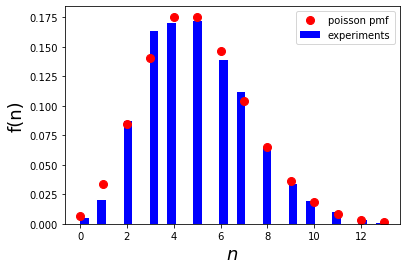

In [56]:
mu = N*P

unResults = np.unique(results) # we extract the set values the result can assume to help us plot the pmf

dataCounts, dataBins = np.histogram(results, bins=35)
dataCountsNorm = dataCounts/(np.sum(dataCounts)) # for pmf, sum of counts must equal 1
binCentres = (dataBins[:-1] + dataBins[1:]) / 2
width = np.diff(dataBins)

plt.figure()
fig, ax = plt.subplots(1, 1)
plt.bar(binCentres, dataCountsNorm, align='center', width=width, label='experiments', color='b')
ax.plot(unResults, poisson.pmf(unResults, mu),'ro', ms=8, label='poisson pmf')
labelx = ax.set_xlabel("$n$", fontsize = 18)
labely = ax.set_ylabel("f(n)", fontsize = 18)
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

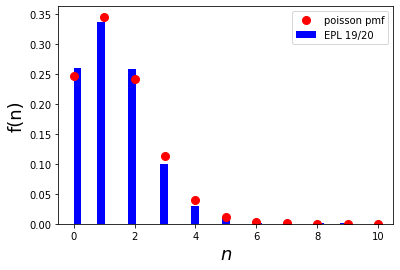

In [89]:
import numpy as np
import pandas as pd
df_epl = pd.read_csv("epl2020.csv")
results = np.array(df_epl["scored"])

unResults = np.unique(results) # we extract the set values the result can assume to help us plot the pmf

dataCounts, dataBins = np.histogram(results, bins=35)
dataCountsNorm = dataCounts/(np.sum(dataCounts)) # for pmf, sum of counts must equal 1
binCentres = (dataBins[:-1] + dataBins[1:]) / 2
width = np.diff(dataBins)


mu =1.4

plt.figure()
fig, ax = plt.subplots(1, 1)
x = np.arange(poisson.ppf(0.001, mu), poisson.ppf(0.9999999, mu))
ax.plot(x, poisson.pmf(x, mu), 'ro', ms=8, label='poisson pmf')
plt.bar(binCentres, dataCountsNorm, align='center', width=width, label='EPL 19/20', color='b')
#h = plt.hist(results, bins='auto',density=True, label='EPL 19/20')
labelx = ax.set_xlabel("$n$", fontsize = 18)
labely = ax.set_ylabel("f(n)", fontsize = 18)
plt.legend()
plt.show()


# Multinomial pmf

- What if the experiment had $m$ possible outcomes instead of 2? e.g, rolling a die?

- Consider the experiment of rolling a **unbiased** die $N$ times
    - 6 possible results $x_i = \left\{ 1 \dots 6 \right\}$ each with equal probilities $P_i = 1/6$ as $\sum_i P_i =1$
    
- Repeat experiment $N_{exps}$ times
    - $n$ would occur with relative frequencies ($P(n)$) given by the **multinomial pmf**.

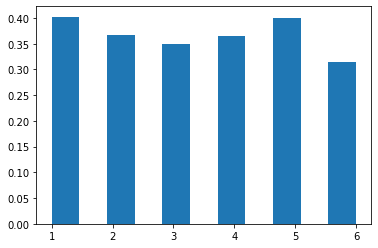

In [7]:
r = randint.rvs(1, 7, size=N_exps)

plt.figure()
h = plt.hist(r, bins='auto',density=True, label='scores')
plt.show()

<Figure size 432x288 with 0 Axes>

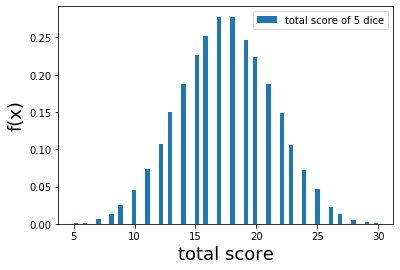

In [8]:
# roll n dice and get total score
n_rolls = 20000
n_die  = 5

total_scores = np.array([])
total_score = 0.0

for roll in range(0,n_rolls):
    total_score = np.sum(randint.rvs(1, 7, size=n_die)) #dice
    #total_score = np.sum(np.random.uniform(1, 7,n_die)) #random floats
    
    #for die in range(0, n_die):
    #    score = randint.rvs(1, 7) 
    #    total_score = total_score + score
    total_scores = np.append(total_scores, total_score)
    
plt.figure()
fig, ax = plt.subplots(1, 1)
text = "total score of " + str(n_die) + " dice"
h = plt.hist(total_scores, bins='auto', density=True, label=text)
labelx = ax.set_xlabel("total score", fontsize = 18)
labely = ax.set_ylabel("f(x)", fontsize = 18)
plt.legend()
plt.show()